<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Getting-two-data-sets" data-toc-modified-id="Getting-two-data-sets-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Getting two data sets</a></span></li><li><span><a href="#The-linear-model-plot" data-toc-modified-id="The-linear-model-plot-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>The linear model plot</a></span></li><li><span><a href="#Colors-and-styles" data-toc-modified-id="Colors-and-styles-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Colors and styles</a></span><ul class="toc-item"><li><span><a href="#Colors" data-toc-modified-id="Colors-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Colors</a></span></li><li><span><a href="#Trick:-Showing-a-color-palette" data-toc-modified-id="Trick:-Showing-a-color-palette-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Trick: Showing a color palette</a></span></li><li><span><a href="#Plot-style" data-toc-modified-id="Plot-style-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Plot style</a></span></li></ul></li><li><span><a href="#Other-types-of-plots" data-toc-modified-id="Other-types-of-plots-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Other types of plots</a></span><ul class="toc-item"><li><span><a href="#The-barplot" data-toc-modified-id="The-barplot-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>The barplot</a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Boxplot</a></span></li><li><span><a href="#Scatter-plot" data-toc-modified-id="Scatter-plot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Scatter plot</a></span></li></ul></li></ul></div>

# Seaborn

The documentation of the functions can be found here: https://seaborn.pydata.org/api.html

Advantages:

+ Seaborn allows to plot a number of standard plots (often relevant in psychology) with minimal effort. Seaborn will calculate grouped averages, standard deviations and regression lines in the background.
+ Seaborn will label axes and legends using the labels in the data.

Disadvantages:

+ It is more difficult to fine-tune a Seaborn plot once it is plotted. The best approach is define styles, colors and labels *before* you create the plot.

In [3]:
import pandas
import seaborn

# Reset to using the default style settings
seaborn.set_style('darkgrid')

## Getting two data sets

The first data set has 578 rows and 4 columns from an experiment on the effect of diet on early growth of chicks:

+ weight:the body weight of the chick (gm).
+ Time:the number of days since birth when the measurement was made.
+ Chick a unique identifier for the chick.
+Diet:a factor with levels 1, ..., 4 indicating which experimental diet the chick received.

The data is obtained from https://vincentarelbundock.github.io/Rdatasets/datasets.html


In [4]:
link = 'http://tinyurl.com/y9awaudp'
chick = pandas.read_csv(link, index_col=0)
chick.head()

,weight,Time,Chick,Diet
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1


The second data set list foot measurements for fourth grade children. The data were collected in October 1997. See http://jse.amstat.org/jse_data_archive.htm for more details. 

These are the columns of the data frame. The data has no header. 

+ Birthdate: month and year  (data were collected in October 1997)
+ Length of longer foot (cm)
+ Width of longer foot (cm), measured at widest part of foot
+ Sex: boy or girl
+ Foot measured (right or left)
+ Right- or left-handedness

In [5]:
feet = pandas.read_csv('https://tinyurl.com/y9a76lsg',header=None, sep='\s+')
feet.columns =  ['M', 'Y', 'L', 'W', 'S', 'F', 'H']
feet['A'] = (10 - feet['M']) + (97 - feet['Y']) * 12
feet.head()

,M,Y,L,W,S,F,H,A
0,5,88,22.4,8.4,B,L,R,113
1,10,87,23.4,8.8,B,L,L,120
2,12,87,22.5,9.7,B,R,R,118
3,1,88,23.2,9.8,B,L,R,117
4,2,88,23.1,8.9,B,L,R,116


## The linear model plot

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


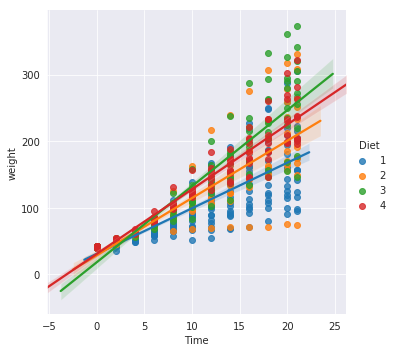

In [6]:
seaborn.lmplot(x='Time', y='weight', hue='Diet', data=chick);

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


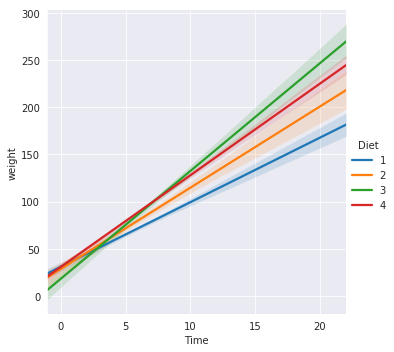

In [7]:
seaborn.lmplot(x='Time', y='weight', hue='Diet',scatter=False, data=chick);

## Colors and styles

### Colors

Seaborn provides a number of functions that allow specifying lists of colors (palettes) that will be used to plot data. See https://seaborn.pydata.org/api.html > Color Palettes.

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


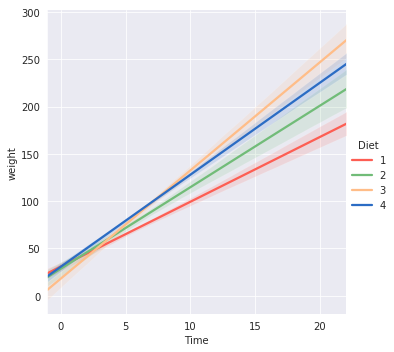

In [8]:
# https://en.wikipedia.org/wiki/List_of_Crayola_crayon_colors#Standard_colors
colors = ['Sunset Orange', 'Fern', 'Macaroni and Cheese', 'Denim']
my_colors = seaborn.crayon_palette(colors)
seaborn.lmplot(x='Time', y='weight', hue='Diet',scatter=False, data=chick, palette=my_colors);

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


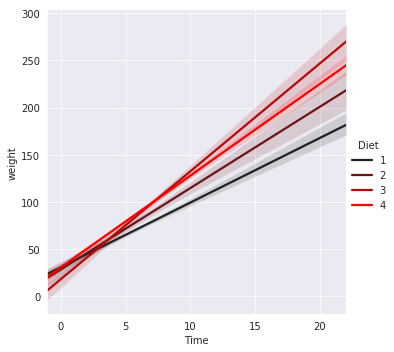

In [11]:
my_colors = seaborn.dark_palette('red', n_colors=4)
seaborn.lmplot(x='Time', y='weight', hue='Diet',scatter=False, data=chick, palette=my_colors);

### Trick: Showing a color palette

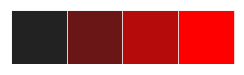

In [12]:
seaborn.palplot(my_colors)

### Plot style

Seaborn has five built-in themes to style its plots: ```darkgrid```, ```whitegrid```, ```dark```, ```white```, and ```ticks```. Seaborn defaults to using the ```darkgrid``` theme for its plots.

You can select another theme for your plots and you can change the settings of a theme.



/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


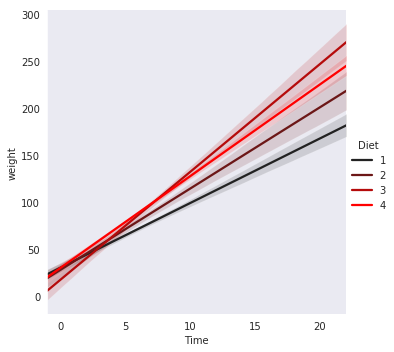

In [14]:
seaborn.set_style('dark')
seaborn.lmplot(x='Time', y='weight', hue='Diet',scatter=False, data=chick, palette=my_colors);

You can get settings for the current style using the ```axis_style()``` function.

In [15]:
seaborn.axes_style()

{'axes.facecolor': '#EAEAF2',
 'axes.edgecolor': 'white',
 'axes.grid': False,
 'axes.axisbelow': True,
 'axes.labelcolor': '.15',
 'figure.facecolor': 'white',
 'grid.color': 'white',
 'grid.linestyle': '-',
 'text.color': '.15',
 'xtick.color': '.15',
 'ytick.color': '.15',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'lines.solid_capstyle': 'round',
 'patch.edgecolor': 'w',
 'image.cmap': 'rocket',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'DejaVu Sans',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'patch.force_edgecolor': True,
 'xtick.bottom': False,
 'xtick.top': False,
 'ytick.left': False,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


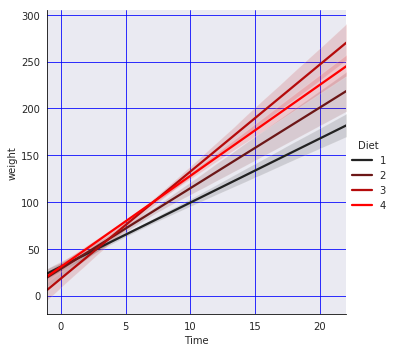

In [16]:
seaborn.set_style('darkgrid', {'axes.spines.top': True,'axes.grid': True,'grid.color': 'blue','axes.linewidth': 10, 'axes.edgecolor':'black'})
seaborn.lmplot(x='Time', y='weight', hue='Diet',scatter=False, data=chick, palette=my_colors);

## Other types of plots

### The barplot

Seaborn makes it easy to plot complex barplots. This is more difficult in ```matplotlib.pyplot```.

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


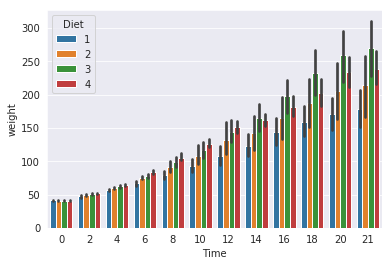

In [17]:
seaborn.set_style('darkgrid')
seaborn.barplot(x='Time', y='weight', hue='Diet', data=chick);

### Boxplot

The box plot is often used when the data is not normally distributed. It allows to show more information about the underlying distribution. I shows the median, the spread and 

![alt text](boxplot.png "Title")


**Note** If the maximum/minimum values in the data are smaller/larger than the whisker values, the whisker values are truncated to show the maximum/minimum values. In this case, the lenght of both whiskers will differ.

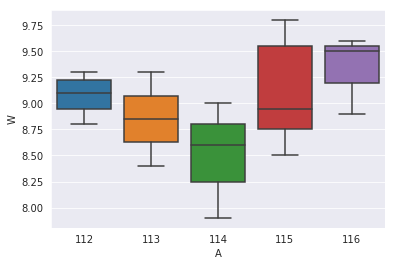

In [25]:
selected = feet.query('A > 111 and A < 117')
seaborn.boxplot(x='A', y='W', data=selected);

### Scatter plot

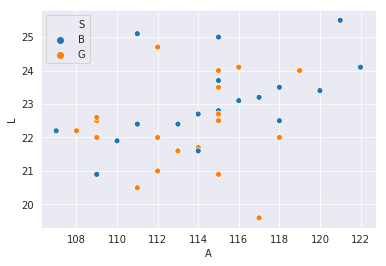

In [63]:
seaborn.scatterplot(x='A', y='L', hue='S', data=feet);

/home/dieter/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


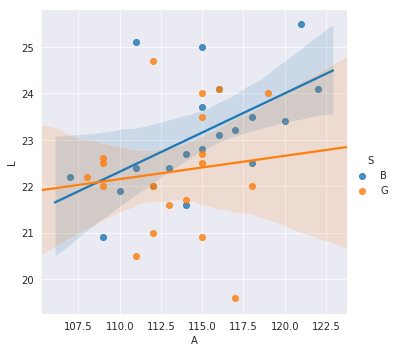

In [64]:
seaborn.lmplot(x='A', y='L', hue='S', data=feet);